In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


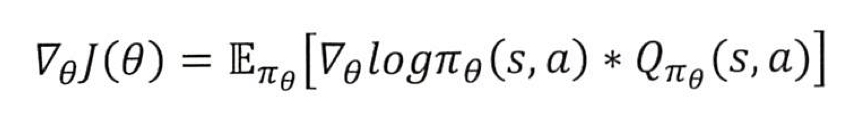

In [3]:
from IPython.display import Image
Image('/gdrive/MyDrive/정리/reinf.jpeg')

In [4]:
'''
정책기반의 학습을 하기 위해 정책 평가 함수 J를 만든다
J 

'''

'\n정책기반의 학습을 하기 위해 정책 평가 함수 J를 만든다\nJ \n\n'

**Q Actor Critic**


In [5]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

In [6]:
#hyperparameters
learning_rate = 0.0002
gamma = 0.98
n_rollout = 10 #몇틱의 데이터를 쌓아서 업데이트 할것인지



In [7]:
def main():
  env = gym.make('CartPole-v1')
  pi = Policy()
  crit = Value()
  score = 0.0
  print_interval = 20

  for n_epi in range(10000):
    s = env.reset()
    done = False

    while not done:
      prob = pi(torch.from_numpy(s).float())
      m = Categorical(prob)
      a = m.sample() #하나의 액션을 샘플링
      Qw = crit(torch.from_numpy(np.append(s, a)).float())
      pi.put_data((prob, Qw))
      pi.train_net()
      s_prime, r, done, info, = env.step(a.item()) #샘플링 된 액션을 실행
      prob_p = pi(torch.from_numpy(s_prime).float())
      m_p = Categorical(prob_p)
      a_p = m_p.sample() #하나의 액션을 샘플링
      Qw_p = crit(torch.from_numpy(np.append(s_prime, a_p)).float())
      crit.put_data((r, Qw, Qw_p))
      crit.train_net()

      s = s_prime
      score += r
      
    #에피소드가 끝날때 마다 에피소드 동안 모은 데이터를 이용해 실제 업데이트가 이루어짐
    pi.train_net() 
    if n_epi%print_interval==0 and n_epi!= 0:
      print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
      score = 0.0
    env.close()



In [8]:
class Policy(nn.Module):
  def __init__(self):
    super(Policy, self).__init__()
    self.data = []

    self.fc1 = nn.Linear(4, 128)
    self.fc2 = nn.Linear(128, 2)
    self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x), dim=0) #두개의 액션에 대한 확률 값을 리턴
    return x
  
  def getV(self, x):
    x = F.relu(self.critic1(x))
    x = self.critic2(x)
    return x

  def put_data(self, item):
    self.data.append(item)

  def train_net(self):
    self.optimizer.zero_grad()
    for prob, Qw in self.data:
      loss = torch.log(prob)*Qw.item()
    #loss.backward() #loss 에 대한 gradient가 누적
    self.optimizer.step() # 축적된 gradient를 이용해 parameter를 업데이트
    self.data = []



In [9]:
class Value(nn.Module):
  def __init__(self):
    super(Value, self).__init__()
    self.data = []

    self.critic1 = nn.Linear(5, 128)
    self.critic2 = nn.Linear(128, 1)
    self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)

  def forward(self, x):
    x = F.relu(self.critic1(x))
    x = self.critic2(x)
    return x

  def put_data(self, item):
    self.data.append(item)


  def train_net(self):
    self.optimizer.zero_grad()
    for r, Qw, Qw_p in self.data:
      loss = (r + gamma*Qw_p - Qw)*Qw
    loss.backward()
    self.optimizer.step()
    self.data = []



In [ ]:
main()

# of episode :20, avg score : 18.5
# of episode :40, avg score : 22.45
# of episode :60, avg score : 24.8
# of episode :80, avg score : 24.3
# of episode :100, avg score : 23.4
# of episode :120, avg score : 23.75
# of episode :140, avg score : 23.95
# of episode :160, avg score : 20.6
# of episode :180, avg score : 20.05
# of episode :200, avg score : 21.4
# of episode :220, avg score : 19.95
# of episode :240, avg score : 23.6
# of episode :260, avg score : 18.7
# of episode :280, avg score : 23.85
# of episode :300, avg score : 22.75
# of episode :320, avg score : 23.3
# of episode :340, avg score : 21.15
# of episode :360, avg score : 22.25
# of episode :380, avg score : 22.5
# of episode :400, avg score : 15.45
# of episode :420, avg score : 21.8
# of episode :440, avg score : 24.95
# of episode :460, avg score : 22.6
# of episode :480, avg score : 22.25
# of episode :500, avg score : 22.35
# of episode :520, avg score : 28.5
# of episode :540, avg score : 21.55
# of episode :560,

KeyboardInterrupt: ignored

In [ ]:

'''
Reinforce 에서 g대신 q𝝿사용 
q 는 미지의 함수 이기 때문에 뉴럴넷 도입
정책 네트워크 𝝿 와 w로 파라미터화 된 밸류네트워크 Qw 두개의 뉴럴넷 학습
𝝿는 

'''

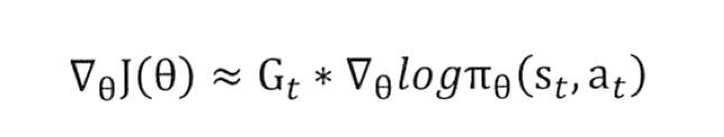

In [10]:
from IPython.display import Image
Image('/gdrive/MyDrive/정리/output0.jpeg')

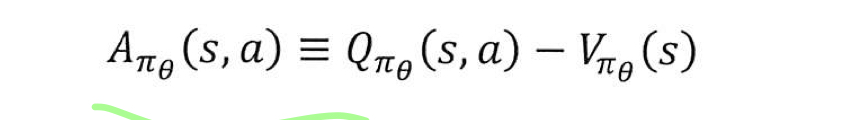

In [11]:
from IPython.display import Image
Image('/gdrive/MyDrive/정리/output1.jpeg')

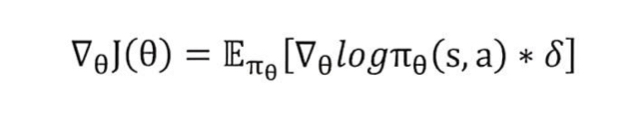

In [12]:
from IPython.display import Image
Image('/gdrive/MyDrive/정리/output2.jpeg')

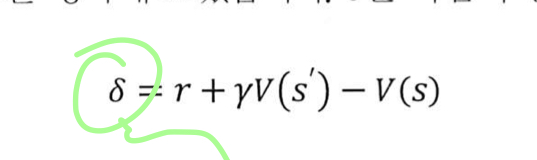

In [13]:
from IPython.display import Image
Image('/gdrive/MyDrive/정리/output3.jpeg')

In [14]:
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

In [15]:
#hyperparameters
learning_rate = 0.0002
gamma = 0.98
n_rollout = 10 #몇틱의 데이터를 쌓아서 업데이트 할것인지

def main():
  env = gym.make('CartPole-v1')
  pi = Policy()
  score = 0.0
  print_interval = 20

  for n_epi in range(10000):
    s = env.reset()
    done = False

    while not done:
      prob = pi(torch.from_numpy(s).float())
      m = Categorical(prob)
      a = m.sample() #하나의 액션을 샘플링
      s_prime, r, done, info, = env.step(a.item()) #샘플링 된 액션을 실행
      pi.put_data((r, prob[a]))
      
      s = s_prime
      score += r
      
    #에피소드가 끝날때 마다 에피소드 동안 모은 데이터를 이용해 실제 업데이트가 이루어짐
    pi.train_net() 
    if n_epi%print_interval==0 and n_epi!= 0:
      print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
      score = 0.0

    env.close()


class Policy(nn.Module):
  def __init__(self):
    super(Policy, self).__init__()
    self.data = []

    self.fc1 = nn.Linear(4, 128)
    self.fc2 = nn.Linear(128, 2) 
    self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x), dim=0) #두개의 액션에 대한 확률 값을 리턴
    return x

  def put_data(self, item):
    self.data.append(item)

  def train_net(self):
    R = 0
    self.optimizer.zero_grad()
    for r, prob in self.data[::-1]:
      R = r + gamma * R
      loss = -R * torch.log(prob)
      loss.backward() #loss 에 대한 gradient가 누적 
    self.optimizer.step() # 축적된 gradient를 이용해 parameter를 업데이트
    self.data = []


main()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# of episode :20, avg score : 24.65
# of episode :40, avg score : 22.0
# of episode :60, avg score : 28.7
# of episode :80, avg score : 24.85
# of episode :100, avg score : 27.35
# of episode :120, avg score : 26.55
# of episode :140, avg score : 27.85
# of episode :160, avg score : 24.05
# of episode :180, avg score : 25.8
# of episode :200, avg score : 33.05
# of episode :220, avg score : 27.85
# of episode :240, avg score : 34.75
# of episode :260, avg score : 26.45
# of episode :280, avg score : 35.9
# of episode :300, avg score : 35.7
# of episode :320, avg score : 35.5


KeyboardInterrupt: ignored

In [16]:
'''
TD Actor critic 
- 
'''


'\nTD Actor critic \n- \n'

In [17]:
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
#hyperparameters
learning_rate = 0.0002
gamma = 0.98
n_rollout = 10 #몇틱의 데이터를 쌓아서 업데이트 할것인지


def main():
  env = gym.make('CartPole-v1')
  model = ActorCritic()
  print_interval =20 
  score = 0.0

  for n_epi in range(10000):
    done = False
    s = env.reset()

    while not done:
      for t in range(n_rollout):
        prob = model.pi(torch.from_numpy(s).float())
        m = Categorical(prob)
        a = m.sample().item()
        s_prime, r, done, info = env.step(a)
        model.put_data((s, a, r,s_prime, done))

        s = s_prime
        score += r 

        if done:
          break

      model.train_net()

    if n_epi%print_interval==0 and n_epi!= 0:
      print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
      score = 0.0

  env.close()

class ActorCritic(nn.Module):
  def __init__(self):
    super(ActorCritic, self).__init__()
    self.data = []

    self.fc1 = nn.Linear(4, 256)
    self.fc_pi = nn.Linear(256, 2)
    self.fc_v = nn.Linear(256, 1) 
    self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)
    
  def pi(self, x, softmax_dim = 0): #정책 함수
    x = F.relu(self.fc1(x))
    x = self.fc_pi(x)
    prob = F.softmax(x, dim=softmax_dim)
    return prob

  def v(self, x): #가치 함수
    x = F.relu(self.fc1(x))
    v = self.fc_v(x)
    return v

  def put_data(self, transition):
    self.data.append(transition)

  def make_batch(self):
    s_lst, a_lst, r_lst, s_prime_lst, done_lst = [], [], [], [], []
    for transition in self.data:
      s,a,r,s_prime,done = transition
      s_lst.append(s)
      a_lst.append([a])
      r_lst.append([r/100.0])
      s_prime_lst.append(s_prime)
      done_mask = 0.0 if done else 1.0
      done_lst.append([done_mask])

    s_batch, a_batch, r_batch, s_prime_batch, done_batch = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
                                  torch.tensor(r_lst, dtype=torch.float), torch.tensor(s_prime_lst, dtype=torch.float), \
                                  torch.tensor(done_lst, dtype=torch.float)

    self.data = []
    return s_batch, a_batch, r_batch, s_prime_batch, done_batch

  def train_net(self):
    s, a, r, s_prime, done = self.make_batch()
    td_target = r + gamma * self.v(s_prime) * done
    delta = td_target - self.v(s)

    pi = self.pi(s, softmax_dim=1)
    pi_a = pi.gather(1,a)
    loss = torch.log(pi_a) * delta.detach() + F.smooth_l1_loss(self.v(s), td_target.detach())

    self.optimizer.zero_grad()
    loss.mean().backward()
    self.optimizer.step()

main()


<ipython-input-17-7c949e7b2ece>:81: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  s_batch, a_batch, r_batch, s_prime_batch, done_batch = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \


# of episode :20, avg score : 18.7
# of episode :40, avg score : 15.75
# of episode :60, avg score : 13.65
# of episode :80, avg score : 14.45
# of episode :100, avg score : 11.3
# of episode :120, avg score : 12.0
# of episode :140, avg score : 10.55
# of episode :160, avg score : 12.25
# of episode :180, avg score : 10.55
# of episode :200, avg score : 10.7
# of episode :220, avg score : 10.0
# of episode :240, avg score : 10.1
# of episode :260, avg score : 10.1
# of episode :280, avg score : 10.3
# of episode :300, avg score : 10.05
# of episode :320, avg score : 9.8
# of episode :340, avg score : 10.0
# of episode :360, avg score : 10.45
# of episode :380, avg score : 9.75
# of episode :400, avg score : 9.3
# of episode :420, avg score : 10.0
# of episode :440, avg score : 9.95
# of episode :460, avg score : 9.7
# of episode :480, avg score : 9.8
# of episode :500, avg score : 10.0
# of episode :520, avg score : 9.75
# of episode :540, avg score : 9.55
# of episode :560, avg score

KeyboardInterrupt: ignored